In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import DVR
import gudhi as gd

def sample(N, r, R, eps):
    # Sample N points from the disjoint union of a circle of radius r and a circle of radius R, where dist(C_r, C_R) = eps
    # Each circle has the uniform distribution
    c = (1/math.sqrt(2))*(r + R + eps)
    angles = [2*math.pi*np.random.rand() for i in range(N)]
    X = np.array([[r*math.cos(theta), r*math.sin(theta)] if np.random.random()<.5 else [R*math.cos(theta) + c, R*math.sin(theta) + c] for i, theta in enumerate(angles)])
    return X
    
def plot_balls(X, R, r, eps, t):
    plt.rcParams["figure.figsize"] = (5,5)
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.set_xlim([-7, 18])
    ax.set_ylim([-7, 18])
    M = ax.transData.get_matrix()
    xscale = M[0,0]
    plt.scatter(X[:, 0], X[:, 1], s = (xscale*t*2)**2, alpha = .1)
    plt.scatter(X[:, 0], X[:, 1], s = 1, color = 'k')

In [2]:
N = 500
r = 1
R = 5
eps = 4

In [45]:
X = sample(N, r, R, eps)
np.save(f'new_N_{N}_r_{r}_R_{R}_eps_{eps}.npy', X)

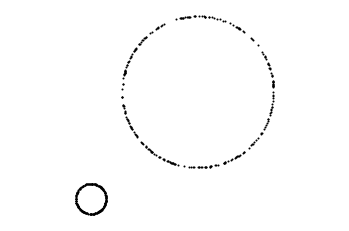

In [3]:
X = np.load(f'new_N_{N}_r_{r}_R_{R}_eps_{eps}.npy')
plt.axis('equal')
plt.axis('off')
plt.scatter(X[:, 0], X[:, 1], s = 1, color = 'k')

Visualize density

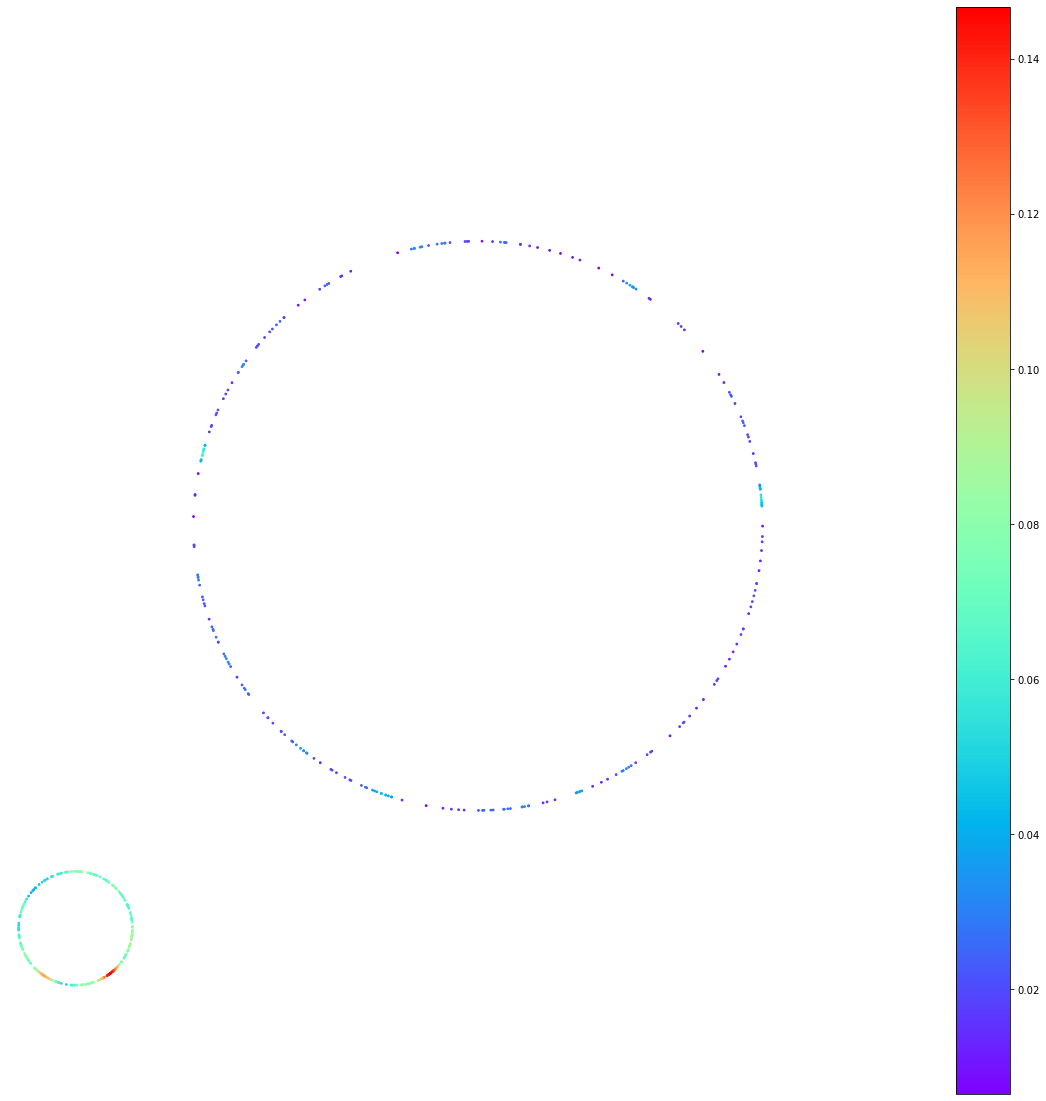

In [53]:
f_est = DVR.f_estimator(1, points = X)
density = f_est.density()
plt.rcParams['figure.figsize'] = (20, 20)
DVR.plot_density(points = X, density = density, s = 3)

Choice of k

Set k =  10


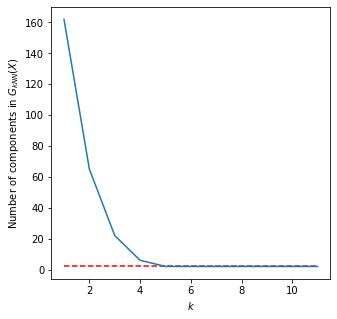

[162, 65, 22, 6, 2, 2, 2, 2, 2, 2, 2]

In [56]:
geo_est = DVR.Geodist_estimator(X, 1)
geo_est.plot_Gknn_components(np.arange(1, geo_est.k+2))

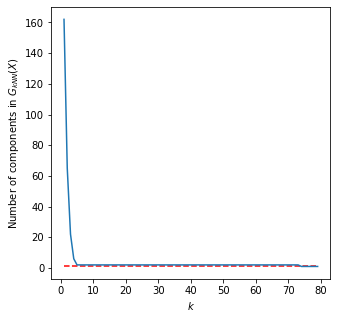

[162,
 65,
 22,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1]

In [111]:
geo_est.plot_Gknn_components(np.arange(1, 80))

Visualize Gknn

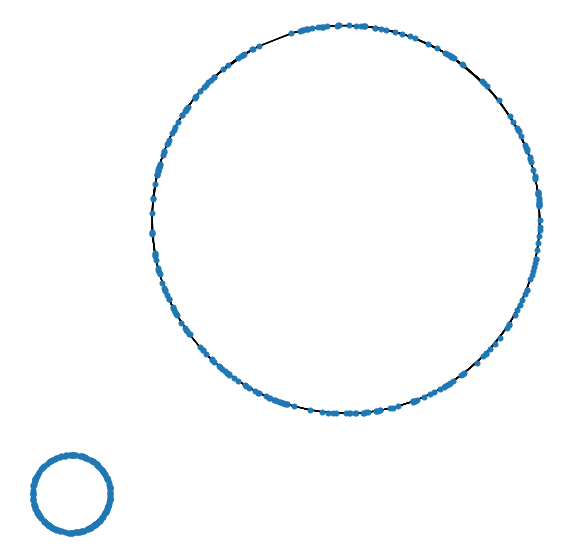

In [58]:
geo_est.plot_Gknn_unweighted()

DVR

Set k =  10


Text(0.5, 1.0, '')

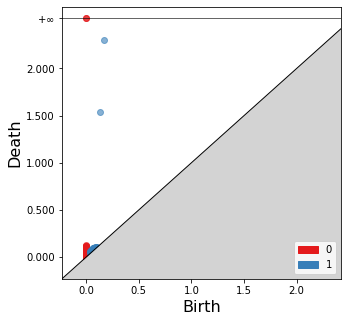

In [113]:
import gudhi as gd
import matplotlib.pyplot as plt
import imp
imp.reload(DVR)
plt.rcParams["figure.figsize"] = (5,5)
geo_cpx = DVR.DVR(1, points = X, max_dimension = 2)
geo_ph = geo_cpx.persistence()
gd.plot_persistence_diagram(persistence = geo_ph, legend = True)
plt.title("")

In [118]:
print(geo_ph[0])
long_life = geo_ph[0][1][1] - geo_ph[0][1][0]
print(geo_ph[1])
short_life = geo_ph[1][1][1] - geo_ph[1][1][0]
print(long_life)
print(short_life)
print(short_life*100/long_life)

(1, (0.17092322907736004, 2.3061257074153185))
(1, (0.1298272591234661, 1.5370039280741836))
2.1352024783379586
1.4071766689507175
65.90366408932157


Trial: Decrease k to the min k s.t. there are two connected components

Text(0.5, 1.0, '')

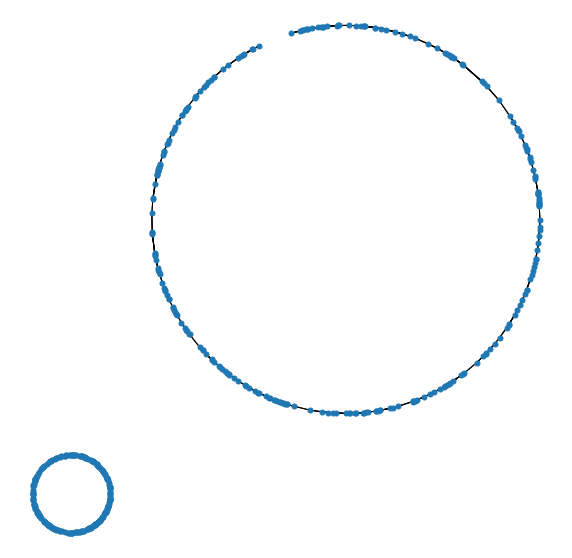

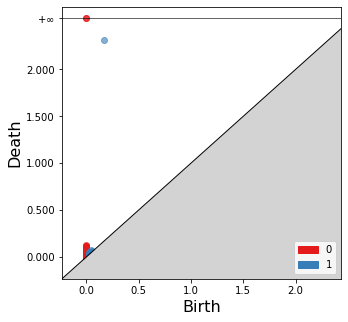

In [8]:
geo_est_mink = DVR.Geodist_estimator(X, 1, k = 5)
geo_est_mink.plot_Gknn_unweighted()
geodist_mink = geo_est_mink.distance_matrix()
geo_cpx_mink = gd.RipsComplex(distance_matrix = geodist_mink).create_simplex_tree(max_dimension = 2)
geo_ph_mink = geo_cpx_mink.persistence()
plt.rcParams['figure.figsize'] = (5, 5)
gd.plot_persistence_diagram(persistence = geo_ph_mink, legend = True)
plt.title("")

Trial: Increase k

Text(0.5, 1.0, '')

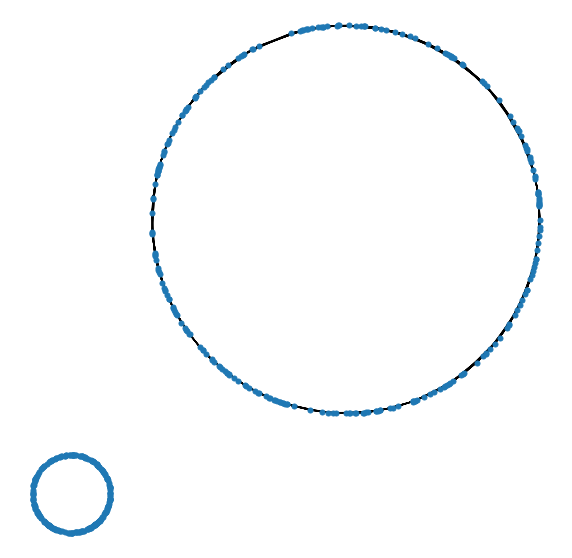

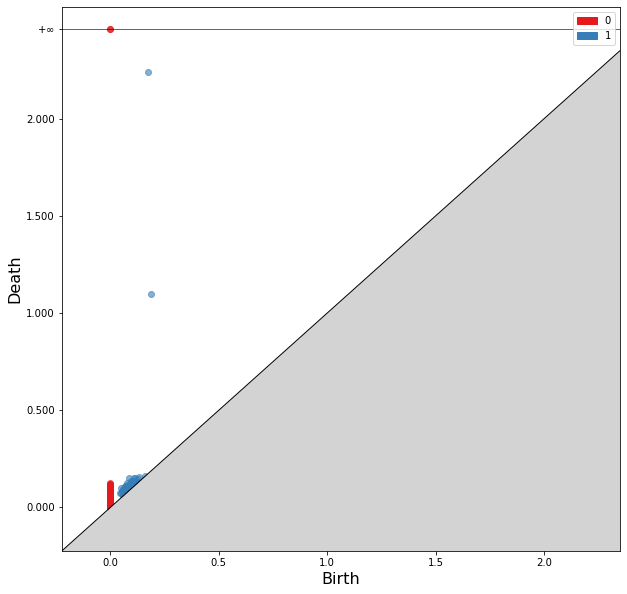

In [9]:
geo_est_bigk = DVR.Geodist_estimator(X, 1, k = 15)
geo_est_bigk.plot_Gknn_unweighted()
geodist_bigk = geo_est_bigk.distance_matrix()
geo_cpx_bigk = gd.RipsComplex(distance_matrix = geodist_bigk).create_simplex_tree(max_dimension = 2)
geo_ph_bigk = geo_cpx_bigk.persistence()
gd.plot_persistence_diagram(persistence = geo_ph_bigk, legend = True)
plt.title("")

Trial: Optimal k with gaussian kernel

Text(0.5, 1.0, '')

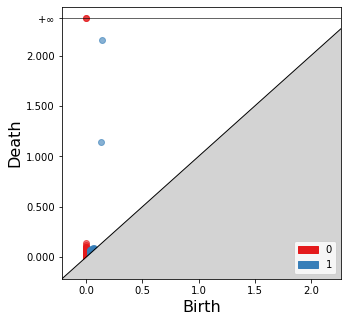

In [15]:
import imp
imp.reload(DVR)
geo_cpx_gauss = DVR.DVR(1, points = X, k = 10, max_dimension = 2, kernel = DVR.f_estimator.gauss)
geo_ph_gauss = geo_cpx_gauss.persistence()
plt.rcParams['figure.figsize'] = (5, 5)
gd.plot_persistence_diagram(persistence = geo_ph_gauss, legend = True)
plt.title("")

Trial: Optimal k with triweight kernel

Text(0.5, 1.0, '')

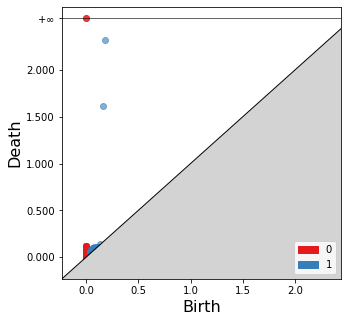

In [16]:
geo_cpx_triweight = DVR.DVR(1, points = X, k = 10, max_dimension = 2, kernel = DVR.f_estimator.triweight)
geo_ph_triweight = geo_cpx_triweight.persistence()
plt.rcParams['figure.figsize'] = (5, 5)
gd.plot_persistence_diagram(persistence = geo_ph_triweight, legend = True)
plt.title("")

In [17]:
print(geo_ph_triweight[0])
long_life = geo_ph_triweight[0][1][1] - geo_ph_triweight[0][1][0]
print(geo_ph_triweight[1])
short_life = geo_ph_triweight[1][1][1] - geo_ph_triweight[1][1][0]
print(long_life)
print(short_life)
print(short_life*100/long_life)

(1, (0.1788316793392907, 2.326132677068097))
(1, (0.16333723024611826, 1.6184819043091292))
2.1473009977288062
1.455144674063011
67.7662179453236


DVR: Epanechnikov kernel

usetex mode requires ghostscript.


Text(0.5, 1.0, '')

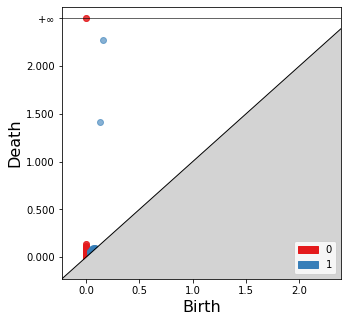

In [7]:
import imp
imp.reload(DVR)
geo_cpx_ep = DVR.DVR(1, points = X, k = 10, max_dimension = 2, kernel = DVR.f_estimator.epanechnikov)
geo_ph_ep = geo_cpx_ep.persistence()
plt.rcParams['figure.figsize'] = (5, 5)
gd.plot_persistence_diagram(persistence = geo_ph_ep, legend = True)
plt.title("")

In [8]:
print(geo_ph_ep[0])
long_life = geo_ph_ep[0][1][1] - geo_ph_ep[0][1][0]
print(geo_ph_ep[1])
short_life = geo_ph_ep[1][1][1] - geo_ph_ep[1][1][0]
print(long_life)
print(short_life)
print(short_life*100/long_life)

(1, (0.15380151315891322, 2.2768546359986632))
(1, (0.12751139398608827, 1.410485421105551))
2.12305312283975
1.2829740271194627
60.43061350266093


Vietoris Rips

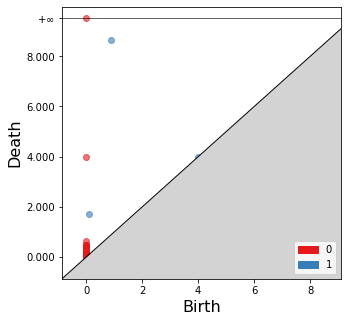

In [115]:
vr = gd.RipsComplex(points = X).create_simplex_tree(max_dimension = 2)
vr_ph = vr.persistence()
gd.plot_persistence_diagram(persistence = vr_ph, legend = True)
plt.title("")
plt.show()

In [117]:
print(vr_ph[0])
long_life = vr_ph[0][1][1] - vr_ph[0][1][0]
print(vr_ph[1])
short_life = vr_ph[1][1][1] - vr_ph[1][1][0]
print(long_life)
print(short_life)
print(short_life*100/long_life)

(1, (0.8855459393109678, 8.665292910902323))
(1, (0.1102063961769634, 1.7327623080777734))
7.779746971591355
1.62255591190081
20.856152749257273


Cech complex balls

t = 0


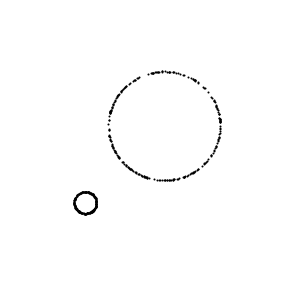

t = 1


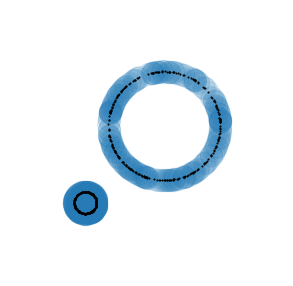

t = 2


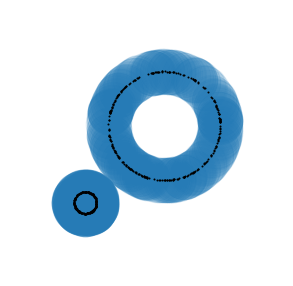

t = 3


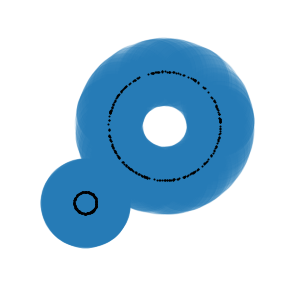

t = 4


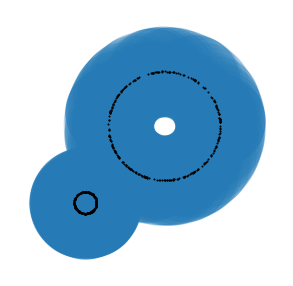

t = 5


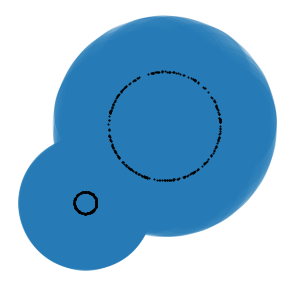

In [59]:
for i in range(6):
    t = i
    print(f"t = {t}")
    plot_balls(X, R, r, eps, t)
    plt.show()